In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from jupyterthemes import jtplot
jtplot.style()

In [2]:
x_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(x_data))

In [3]:
noise

array([-0.74258279, -0.74075996,  0.09686846, ...,  2.30354942,
        0.315474  , -0.49275451])

y = mx + b

b = 5

In [4]:
y_true = (0.5 * x_data) + 5 + noise

In [5]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns= ['Y True'])

In [6]:
my_data = pd.concat([x_df, y_df], axis=1)

In [7]:
my_data.head()

,X Data,Y True
0,0.00000,4.257417
1,0.00001,4.259245
2,0.00002,5.096878
3,0.00003,6.296302
4,0.00004,3.069847


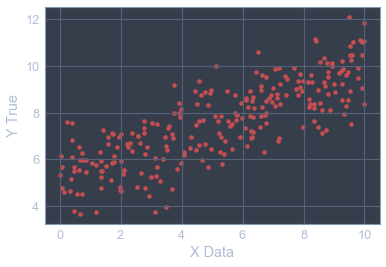

In [8]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y True', color='r')

In [9]:
batch_size = 8 # Let's get 8 points at a time

In [10]:
m = tf.Variable(0.0)
b = tf.Variable(0.0)

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
x_ph = tf.placeholder("float", [batch_size])
y_ph = tf.placeholder("float", [batch_size])

In [12]:
y_model = m * x_ph + b

In [13]:
loss_fn = tf.reduce_sum((y_ph - y_model) ** 2)

In [14]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss_fn)

In [15]:
init = tf.global_variables_initializer()

In [16]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    
    for i in range(batches):
        rand_idx = np.random.randint(len(x_data),size = batch_size)
        feed = {x_ph : x_data[rand_idx], y_ph: y_true[rand_idx]}
        sess.run(optimizer, feed_dict = feed)
        
    model_m, model_b = sess.run([m, b])

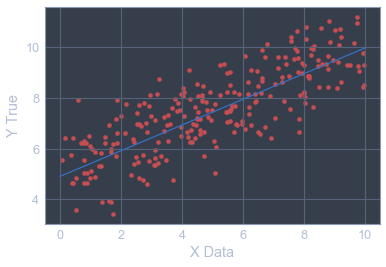

In [17]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y True', color='r')
x = np.linspace(0, 10, 2)
y = model_m * x + model_b
plt.plot(x, y)

In [18]:
model_m

0.5064292

In [19]:
model_b

4.904078